In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

# Data

## Load dataset

In [6]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

## Initialize the Random Forest regressor

In [7]:
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

## Train the model

In [8]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

## Define the parameter grid


In [9]:
param_grid = {
  'n_estimators': [50, 100, 200],
  'max_depth': [5, 10, 20],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4]
}

## Initialize the GridSearchCV object

In [10]:
grid_search = GridSearchCV(
  estimator=RandomForestRegressor(random_state=42),
  param_grid=param_grid,
  scoring='neg_mean_squared_error',
  cv=3,
  verbose=1
)

## Perform grid search

In [11]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


KeyboardInterrupt: 

## Train with the best parameters

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model with the best parameters
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

# Test set prediction

In [12]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 0.544511508935255


## Feature importances

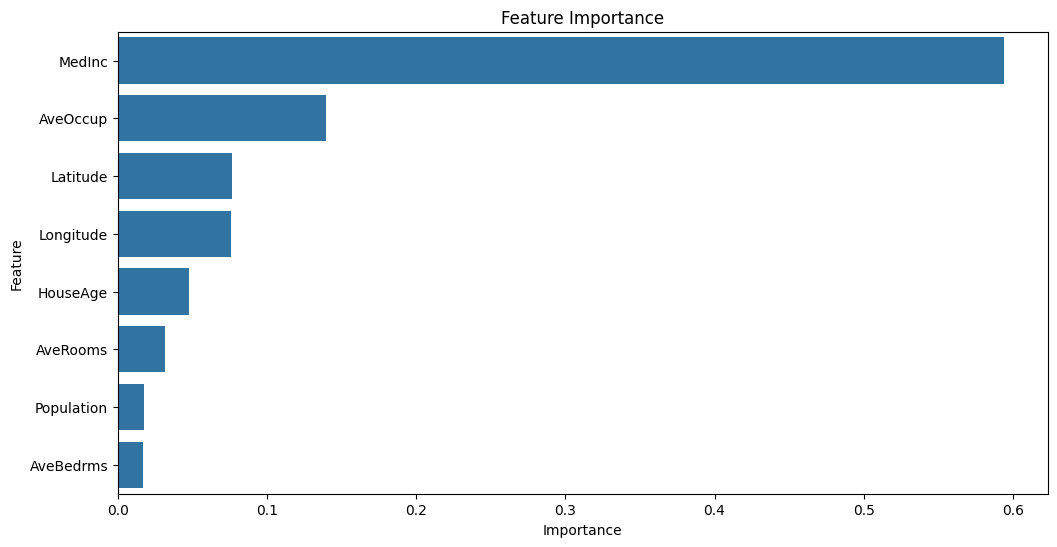

In [13]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

## Plot predicted vs actual values

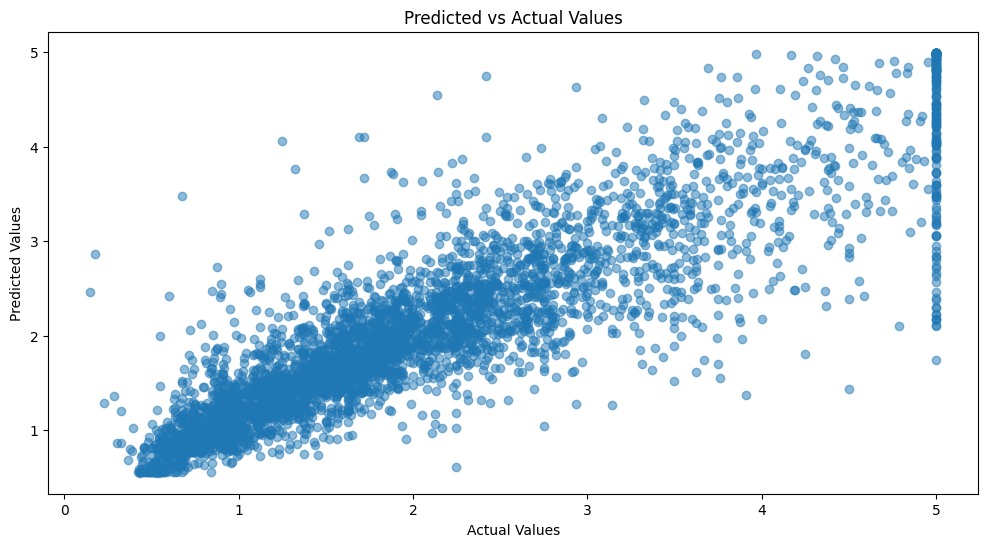

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()